In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.asarray(pd.read_csv('csv/erisa003-quats.csv'))

In [3]:
# x = x.reshape(len(x), -1, 3) # euler, xyz positions
x = x.reshape(len(x), -1, 4) # quats

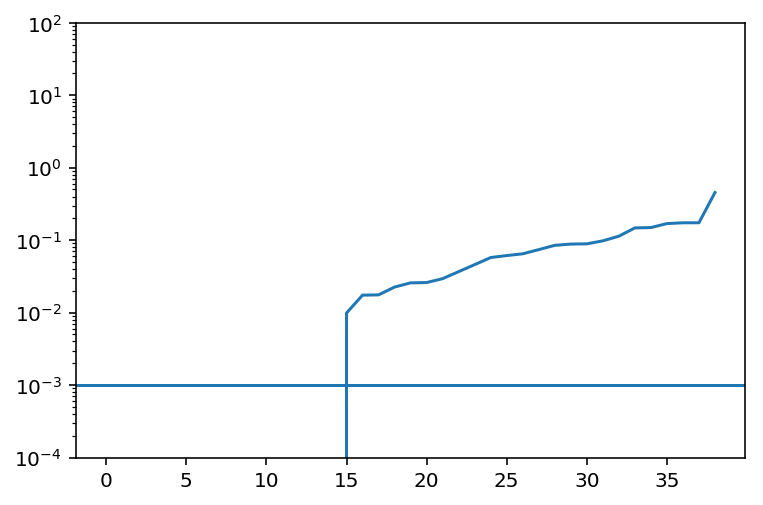

In [4]:
std = np.std(x, axis=0) # take std dev for each channel
std = np.max(std, axis=1) # get max of std dev across channels
plt.plot(np.sort(std))
plt.yscale('log')
plt.axhline(1e-3)
plt.ylim([1e-4,100])
plt.show()

In [5]:
def remove_empty(x, threshold):
    std = np.std(x, axis=0) # take std dev for each channel
    std = np.max(std, axis=1) # get max of std dev across channels
    return x[:, std>threshold, :]

In [6]:
x_empty = remove_empty(x, 1e-3)
x_empty.shape

(42336, 24, 4)

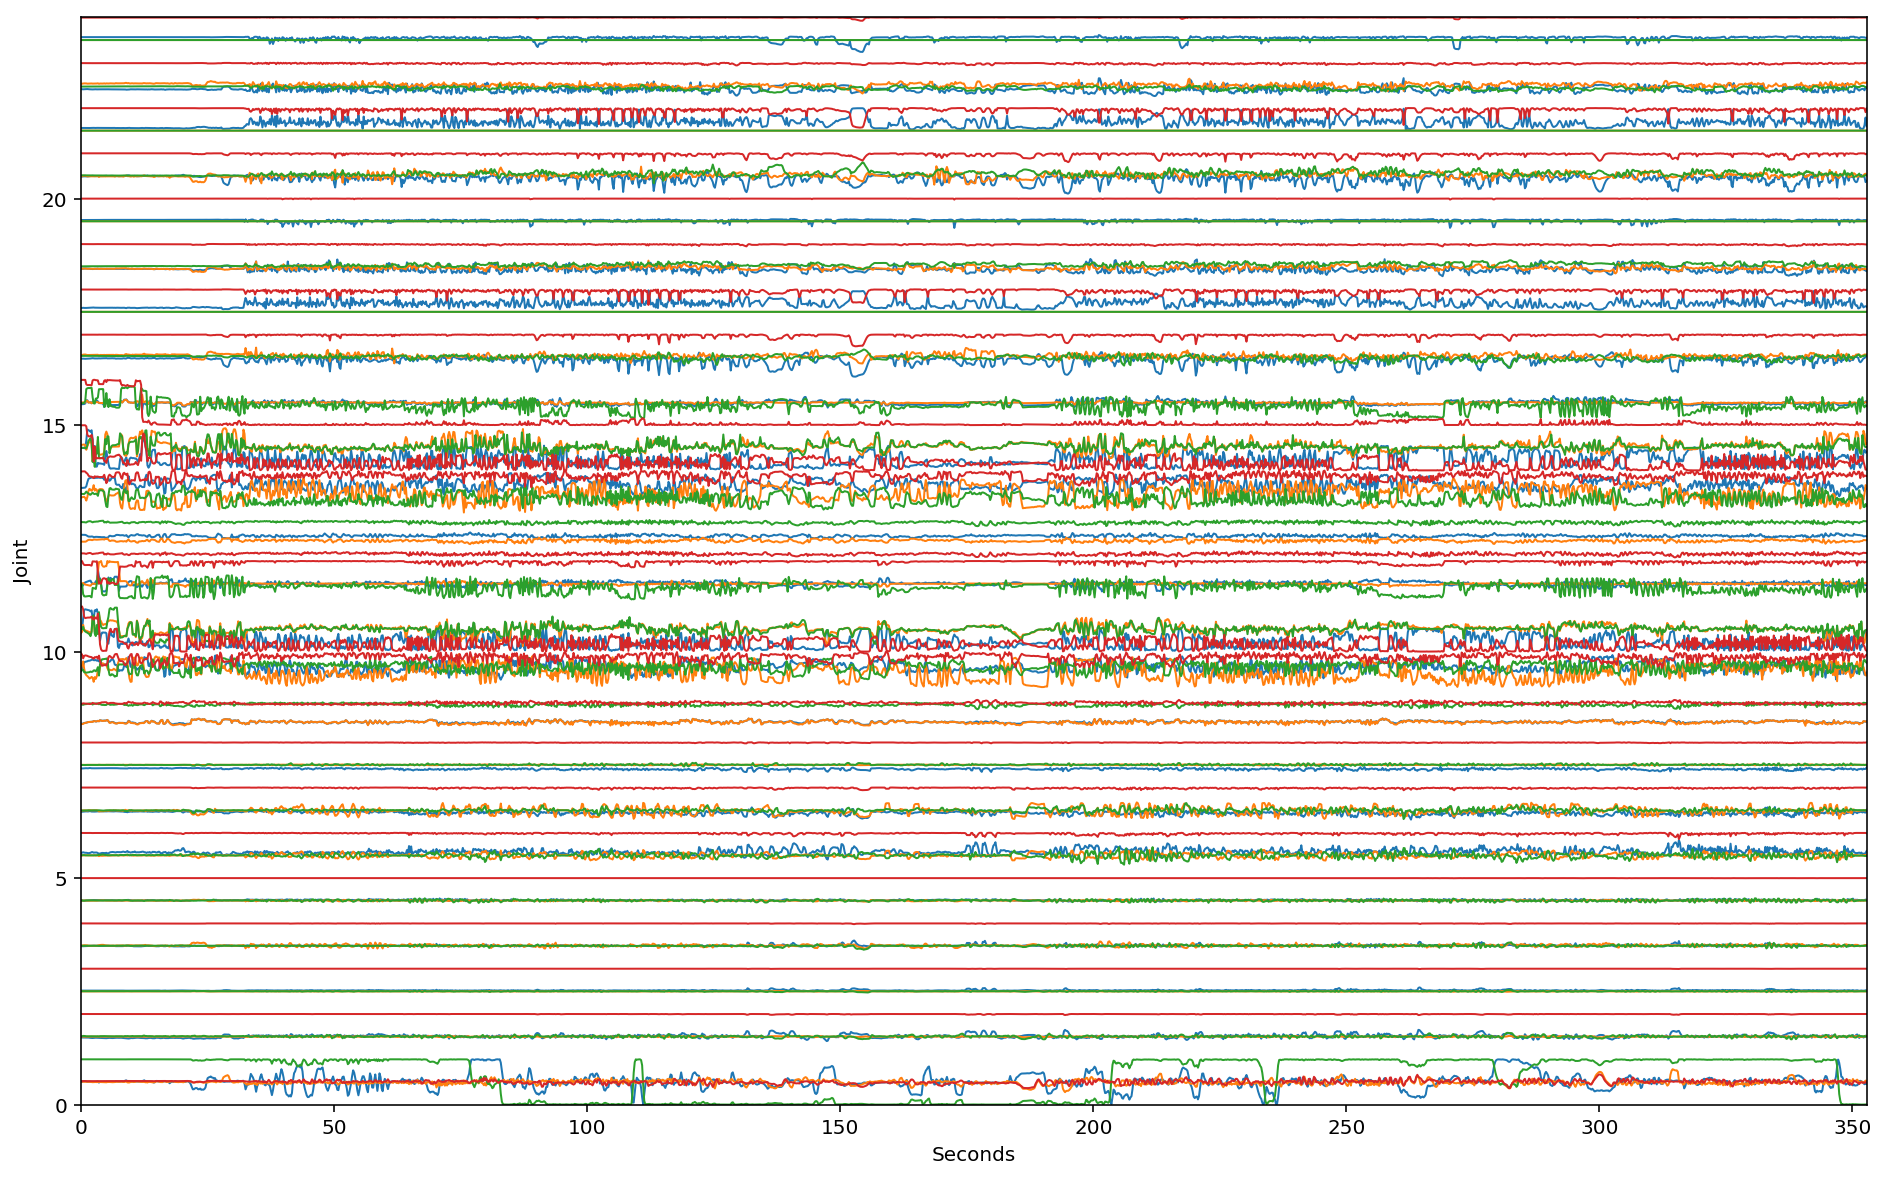

In [7]:
skip = 25
samplerate = 120

duration = len(x_empty) / float(samplerate)
x_skipped = x_empty.transpose(1,0,2)[:,::skip,:]
plt.figure(figsize=(16,10))
for i,joint in enumerate(x_skipped):
    plt.gca().set_prop_cycle(None)
    plt.plot(np.linspace(0,duration,len(joint)), i+joint, lw=1)
plt.ylim([0,x_skipped.shape[0]])
plt.xlim([0,duration])
plt.ylabel('Joint')
plt.xlabel('Seconds')
plt.show()

In [8]:
def load_all(fns, channels, threshold):
    all = []
    for fn in fns:
        x = np.asarray(pd.read_csv(fn))
        x = x.reshape(len(x), -1, channels)
        x = remove_empty(x, threshold)
        all.append(x)
    return np.vstack(all)

In [9]:
euler = load_all(['csv/erisa00{}-euler.csv'.format(i) for i in '1234'], 3, 1e-3)
quats = load_all(['csv/erisa00{}-quats.csv'.format(i) for i in '1234'], 4, 1e-3)
global_positions = load_all(['csv/erisa00{}-global-positions.csv'.format(i) for i in '1234'], 3, 1e-3)
local_positions = load_all(['csv/erisa00{}-local-positions.csv'.format(i) for i in '1234'], 3, 1e-3)

In [10]:
np.save('euler.npy', euler)
np.save('quats.npy', quats)
np.save('global_positions.npy', global_positions)
np.save('local_positions.npy', local_positions)

In [14]:
for fn,x in zip(
    ['euler', 'quats', 'global_positions', 'local_positions'],
    [euler, quats, global_positions, local_positions]):
    print(x.shape, fn)

(173004, 24, 3) euler
(173004, 24, 4) quats
(173004, 37, 3) global_positions
(173004, 33, 3) local_positions
